## The Sparks Foundation - GRIP - Data Science and Business Analytics - JUN'2023

### TASK 1 : Prediction using unsupervised ML

#### AUTHOR : Girthyka A A

#### Dataset used:https://bit.ly/3kXTdox

####  Problem Statement :
* Predict the optimum number of clusters and represent it visually.

#### importing all the required libraries

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### reading the data

In [85]:
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [86]:
iris.shape

(150, 6)

In [87]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [88]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [90]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [94]:
# checking for null values

iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [95]:
iris.drop('Id', axis=1, inplace=True)

In [96]:
# checking duplicate values
dupes=iris.duplicated().sum()
print("no of dupes= ",dupes)

no of dupes=  3


In [97]:
iris.drop_duplicates(inplace=True)

#### checking for outliers in the data

C:\Users\GOWSIKA ATHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


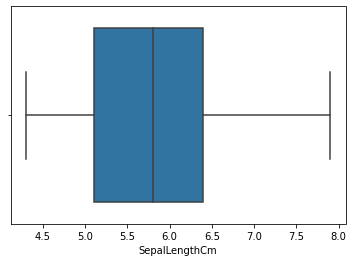

C:\Users\GOWSIKA ATHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


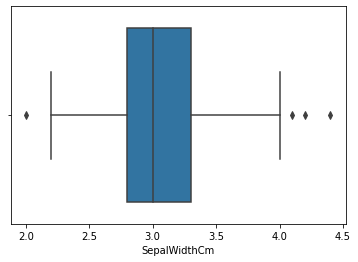

C:\Users\GOWSIKA ATHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


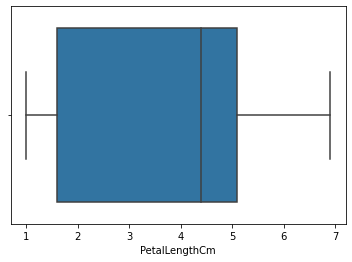

C:\Users\GOWSIKA ATHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


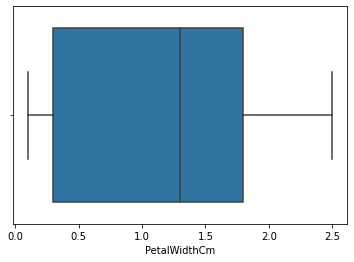

In [98]:
for i in iris.columns:
    if iris[i].dtype== 'float64':
        plt.figure(figsize=(6,4))
        sns.boxplot(iris[i])
        plt.show()

In [99]:
## Treating outliers present in the SepalWidthCm column

q1,q3 = np.percentile(iris['SepalWidthCm'],[25,75])
iqr = q3-q1
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
iris['SepalWidthCm'] = iris['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence 
                                                  else lower_fence if x<lower_fence else x)

C:\Users\GOWSIKA ATHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

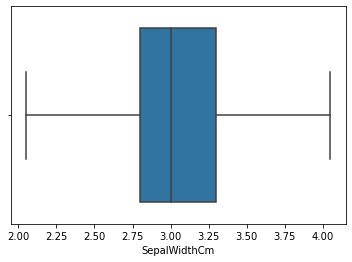

In [100]:
sns.boxplot(iris['SepalWidthCm'])


### understanding and visualization of the given data


In [101]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64


C:\Users\GOWSIKA ATHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


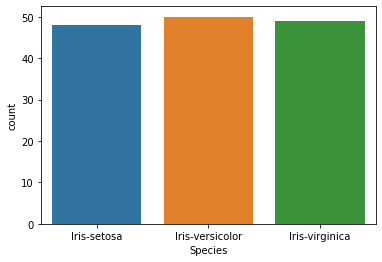

In [102]:
print(iris.Species.value_counts())
sns.countplot(iris.Species);

In [104]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.110155,0.871305,0.817058
SepalWidthCm,-0.110155,1.000000,-0.420140,-0.355139
PetalLengthCm,0.871305,-0.420140,1.000000,0.961883
PetalWidthCm,0.817058,-0.355139,0.961883,1.000000


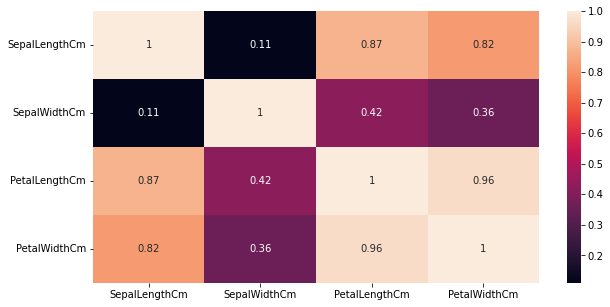

In [106]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(iris.corr()), cmap='rocket', annot=True);

## applying k means

#### Using 'Elbow Method' to find optimum number of clusters for k-means classification:

In [111]:
from sklearn.cluster import KMeans
OMP_NUM_THREADS=1

In [112]:
sum_square = []
for i in range(1,10):
    kmeans = KMeans( n_clusters = i, init='k-means++')
    kmeans.fit(iris.iloc[:,[0,1,2,3]])
    sum_square.append(kmeans.inertia_)

C:\Users\GOWSIKA ATHI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


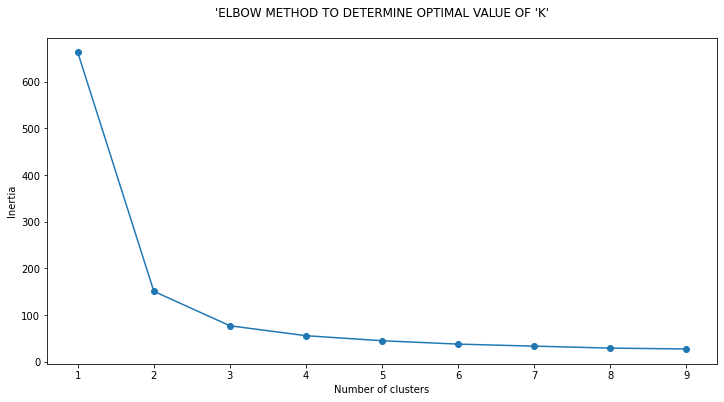

In [113]:
cluster_iris = pd.DataFrame({'Cluster':range(1,10), 'sum_square':sum_square})
plt.figure(figsize=(12,6))
plt.plot(cluster_iris['Cluster'], cluster_iris['sum_square'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia');
plt.title("'ELBOW METHOD TO DETERMINE OPTIMAL VALUE OF 'K'\n");

Elbow occurs where the line graph bends and wcs(within cluster sum of squares ) does not decrease significantly with every iteration. From the above graph, Elbow occurs at number of clusters equivalent to 3.

### Create and Train the Model 

In [115]:
kmeans = KMeans( n_clusters = 3, init='k-means++')
kmeans.fit(iris.iloc[:,[0,1,2,3]])
kmeans.cluster_centers_

array([[5.90327869, 2.75      , 4.38196721, 1.42622951],
       [5.01041667, 3.41979167, 1.4625    , 0.25      ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [116]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0])

In [117]:
iris['cluster'] = kmeans.labels_

iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [118]:
iris['cluster'].value_counts()

0    61
1    48
2    38
Name: cluster, dtype: int64

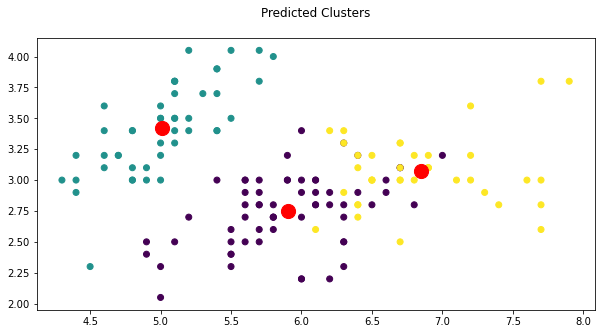

In [119]:
plt.figure(figsize=(10,5))
plt.scatter(iris['SepalLengthCm'], iris['SepalWidthCm'], c=iris.cluster)
plt.title('Predicted Clusters\n')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1] ,  s=200, c='red', label = 'Centroids')
plt.show()

In [121]:
#checking the accuracy

iris.loc[iris['Species']=='Iris-setosa']['cluster'].value_counts()
iris.loc[iris['Species']=='Iris-versicolor']['cluster'].value_counts()
iris.loc[iris['Species']=='Iris-virginica']['cluster'].value_counts()

2    36
0    13
Name: cluster, dtype: int64

In [123]:
iris['Species_encoded'] = iris['Species'].apply(lambda x: 1 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 0)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2


In [124]:
from sklearn.metrics import classification_report
print(classification_report(iris['Species_encoded'],iris['cluster']))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86        50
           1       1.00      1.00      1.00        48
           2       0.95      0.73      0.83        49

    accuracy                           0.90       147
   macro avg       0.91      0.90      0.90       147
weighted avg       0.91      0.90      0.90       147



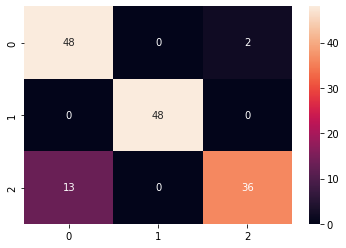

In [126]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(iris['Species_encoded'],iris['cluster']), annot=True);